In [1]:
using ComputationalHeatTransfer
using LaTeXStrings
using Revise
using LinearAlgebra
using DifferentialEquations
using Interpolations
using JLD2
using Plots
pyplot()  

cd(dirname(pwd()))
cd("src") 
includet("OneDOHP.jl")
using ..OneDOHP

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise C:\Users\liyux\.julia\packages\Revise\1boD5\src\packagedef.jl:1369


In [5]:
cd(dirname(pwd()))
pwd()

"C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl"

In [6]:
plate_hist, integrator_plate = load("plate_OHP3.jld2", "plate_hist",  "integrator_plate")
sys = integrator_plate.p

Unbounded Heat conduction system on a grid of size 280 x 120 and 0 static immersed points


In [7]:
tube_hist, integrator_tube = load("tube_OHP3.jld2", "tube_hist",  "integrator_tube")

sysfinal = []
for i = 1:length(tube_hist)
    push!(sysfinal, deepcopy(getcurrentsys(tube_hist[i].u,tube_hist[i].p)))
end

┌ Warning: saved type Tube is missing field ΔTthres in workspace type; reconstructing
└ @ JLD2 C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:152
Error encountered while load FileIO.File{FileIO.DataFormat{:JLD2},String}("tube_OHP3.jld2").

Fatal error:


LoadError: [91m[91mJLD2 load error: neither load nor fileio_load is defined[39m[39m
[91m[91m  due to MethodError(convert, (Tube, JLD2.ReconstructedTypes.var"##Tube#254"(0.00656, 34.35, 1.0, 0.0, true)), 0x0000000000006f4b)[39m[39m
[91m[91m  Will try next loader.[39m[39m

[91mjlconvert at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\writing_datatypes.jl:302 [inlined][39m
[91mmacro expansion at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:557 [inlined][39m
[91mjlconvert(::JLD2.ReadRepresentation{PHPSystem,JLD2.OnDiskRepresentation{(0, 8, 16, 24, 32, 40, 48),Tuple{Tube,Evaporator,Condenser,Liquid,Vapor,Wall,Mapping},NTuple{7,JLD2.RelOffset}}()}, ::JLD2.JLDFile{JLD2.MmapIO}, ::Ptr{Nothing}, ::JLD2.RelOffset) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:502[39m
[91mread_scalar at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\dataio.jl:37 [inlined][39m
[91mread_data(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadRepresentation{PHPSystem,JLD2.OnDiskRepresentation{(0, 8, 16, 24, 32, 40, 48),Tuple{Tube,Evaporator,Condenser,Liquid,Vapor,Wall,Mapping},NTuple{7,JLD2.RelOffset}}()}, ::Tuple{JLD2.ReadDataspace,JLD2.RelOffset,Int64,UInt16}, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:170[39m
[91mread_data(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadDataspace, ::UInt8, ::Int64, ::Int64, ::Int64, ::UInt16, ::JLD2.RelOffset, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:149[39m
[91mload_dataset(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.RelOffset) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:92[39m
[91mjlconvert at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\writing_datatypes.jl:301 [inlined][39m
[91mmacro expansion at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:557 [inlined][39m
[91mjlconvert(::JLD2.ReadRepresentation{ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33),Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Float64,1},Tuple{Float64,Float64},PHPSystem,Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,Tuple{Float64,Float64},JLD2.RelOffset,nothing,nothing}}()}, ::JLD2.JLDFile{JLD2.MmapIO}, ::Ptr{Nothing}, ::JLD2.RelOffset) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:502[39m
[91m ... (the last 2 lines are repeated 1 more time)[39m
[91mmacro expansion at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:520 [inlined][39m
[91mjlconvert(::JLD2.ReadRepresentation{OrdinaryDiffEq.ODEIntegrator{RK4,false,Array{Float64,1},Nothing,Float64,PHPSystem,Float64,Float64,Float64,Float64,Array{Array{Float64,1},1},ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},RK4,OrdinaryDiffEq.InterpolationData{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4ConstantCache},DiffEqBase.DEStats},ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},OrdinaryDiffEq.RK4ConstantCache,OrdinaryDiffEq.DEOptions{Float64,Float64,Float64,Float64,PIController{Rational{Int64}},typeof(DiffEqBase.ODE_DEFAULT_NORM),typeof(opnorm),Nothing,CallbackSet{Tuple{},Tuple{DiscreteCallback{typeof(boiling_condition),typeof(boiling_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)},DiscreteCallback{typeof(merging_condition),typeof(merging_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}}},typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN),typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE),typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK),DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},Nothing,Nothing,Int64,Tuple{},Tuple{},Tuple{}},Array{Float64,1},Float64,Nothing,OrdinaryDiffEq.DefaultInit},JLD2.OnDiskRepresentation{(0, 116, 124, 124, 132, 140, 148, 149, 157, 165, 173, 173, 181, 181, 189, 190, 198, 206, 214, 222, 230, 238, 246, 254, 262, 270, 278, 286, 286, 286, 294, 295, 296, 297, 298, 306, 314, 322, 323, 324, 325, 326, 327, 328, 336, 344, 344, 352),Tuple{ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},RK4,OrdinaryDiffEq.InterpolationData{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4ConstantCache},DiffEqBase.DEStats},Array{Float64,1},Nothing,Array{Array{Float64,1},1},Float64,Float64,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},PHPSystem,Array{Float64,1},Array{Float64,1},Nothing,Float64,RK4,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,OrdinaryDiffEq.RK4ConstantCache,Nothing,Int64,Bool,Bool,Bool,Bool,Int64,Int64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,OrdinaryDiffEq.DEOptions{Float64,Float64,Float64,Float64,PIController{Rational{Int64}},typeof(DiffEqBase.ODE_DEFAULT_NORM),typeof(opnorm),Nothing,CallbackSet{Tuple{},Tuple{DiscreteCallback{typeof(boiling_condition),typeof(boiling_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)},DiscreteCallback{typeof(merging_condition),typeof(merging_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}}},typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN),typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE),typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK),DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},Nothing,Nothing,Int64,Tuple{},Tuple{},Tuple{}},DiffEqBase.DEStats,OrdinaryDiffEq.DefaultInit,Array{Float64,1},Array{Float64,1}},Tuple{JLD2.OnDiskRepresentation{(0, 8, 8, 8, 16, 24, 57, 57, 83, 84, 92, 100),Tuple{Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},RK4,OrdinaryDiffEq.InterpolationData{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4ConstantCache},Bool,Int64,DiffEqBase.DEStats,Symbol},Tuple{JLD2.RelOffset,nothing,nothing,JLD2.RelOffset,JLD2.RelOffset,JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33),Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Float64,1},Tuple{Float64,Float64},PHPSystem,Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,Tuple{Float64,Float64},JLD2.RelOffset,nothing,nothing}}(),nothing,JLD2.OnDiskRepresentation{(0, 1, 9, 17, 25, 26),Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},Bool,OrdinaryDiffEq.RK4ConstantCache},Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,JLD2.RelOffset,JLD2.RelOffset,Bool,nothing}}(),Bool,Int64,JLD2.RelOffset,JLD2.Vlen{String}}}(),JLD2.RelOffset,nothing,JLD2.RelOffset,Float64,Float64,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,JLD2.RelOffset,JLD2.RelOffset,nothing,Float64,nothing,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,nothing,nothing,Int64,Bool,Bool,Bool,Bool,Int64,Int64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,JLD2.RelOffset,JLD2.RelOffset,nothing,JLD2.RelOffset,JLD2.RelOffset}}()}, ::JLD2.JLDFile{JLD2.MmapIO}, ::Ptr{Nothing}, ::JLD2.RelOffset) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\reconstructing_datatypes.jl:502[39m
[91mread_scalar at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\dataio.jl:37 [inlined][39m
[91mread_data(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadRepresentation{OrdinaryDiffEq.ODEIntegrator{RK4,false,Array{Float64,1},Nothing,Float64,PHPSystem,Float64,Float64,Float64,Float64,Array{Array{Float64,1},1},ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},RK4,OrdinaryDiffEq.InterpolationData{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4ConstantCache},DiffEqBase.DEStats},ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},OrdinaryDiffEq.RK4ConstantCache,OrdinaryDiffEq.DEOptions{Float64,Float64,Float64,Float64,PIController{Rational{Int64}},typeof(DiffEqBase.ODE_DEFAULT_NORM),typeof(opnorm),Nothing,CallbackSet{Tuple{},Tuple{DiscreteCallback{typeof(boiling_condition),typeof(boiling_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)},DiscreteCallback{typeof(merging_condition),typeof(merging_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}}},typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN),typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE),typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK),DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},Nothing,Nothing,Int64,Tuple{},Tuple{},Tuple{}},Array{Float64,1},Float64,Nothing,OrdinaryDiffEq.DefaultInit},JLD2.OnDiskRepresentation{(0, 116, 124, 124, 132, 140, 148, 149, 157, 165, 173, 173, 181, 181, 189, 190, 198, 206, 214, 222, 230, 238, 246, 254, 262, 270, 278, 286, 286, 286, 294, 295, 296, 297, 298, 306, 314, 322, 323, 324, 325, 326, 327, 328, 336, 344, 344, 352),Tuple{ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},RK4,OrdinaryDiffEq.InterpolationData{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4ConstantCache},DiffEqBase.DEStats},Array{Float64,1},Nothing,Array{Array{Float64,1},1},Float64,Float64,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},PHPSystem,Array{Float64,1},Array{Float64,1},Nothing,Float64,RK4,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,OrdinaryDiffEq.RK4ConstantCache,Nothing,Int64,Bool,Bool,Bool,Bool,Int64,Int64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,OrdinaryDiffEq.DEOptions{Float64,Float64,Float64,Float64,PIController{Rational{Int64}},typeof(DiffEqBase.ODE_DEFAULT_NORM),typeof(opnorm),Nothing,CallbackSet{Tuple{},Tuple{DiscreteCallback{typeof(boiling_condition),typeof(boiling_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)},DiscreteCallback{typeof(merging_condition),typeof(merging_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}}},typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN),typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE),typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK),DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},DataStructures.BinaryHeap{Float64,Base.Order.ForwardOrdering},Nothing,Nothing,Int64,Tuple{},Tuple{},Tuple{}},DiffEqBase.DEStats,OrdinaryDiffEq.DefaultInit,Array{Float64,1},Array{Float64,1}},Tuple{JLD2.OnDiskRepresentation{(0, 8, 8, 8, 16, 24, 57, 57, 83, 84, 92, 100),Tuple{Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},ODEProblem{Array{Float64,1},Tuple{Float64,Float64},false,PHPSystem,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},RK4,OrdinaryDiffEq.InterpolationData{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.RK4ConstantCache},Bool,Int64,DiffEqBase.DEStats,Symbol},Tuple{JLD2.RelOffset,nothing,nothing,JLD2.RelOffset,JLD2.RelOffset,JLD2.OnDiskRepresentation{(0, 1, 9, 25, 33, 33),Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Float64,1},Tuple{Float64,Float64},PHPSystem,Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}},SciMLBase.StandardODEProblem},Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,Tuple{Float64,Float64},JLD2.RelOffset,nothing,nothing}}(),nothing,JLD2.OnDiskRepresentation{(0, 1, 9, 17, 25, 26),Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},Bool,OrdinaryDiffEq.RK4ConstantCache},Tuple{ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,JLD2.RelOffset,JLD2.RelOffset,Bool,nothing}}(),Bool,Int64,JLD2.RelOffset,JLD2.Vlen{String}}}(),JLD2.RelOffset,nothing,JLD2.RelOffset,Float64,Float64,ODEFunction{false,typeof(ODE_innertube),UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing},JLD2.RelOffset,JLD2.RelOffset,JLD2.RelOffset,nothing,Float64,nothing,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Int64,nothing,nothing,Int64,Bool,Bool,Bool,Bool,Int64,Int64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,JLD2.RelOffset,JLD2.RelOffset,nothing,JLD2.RelOffset,JLD2.RelOffset}}()}, ::Tuple{JLD2.ReadDataspace,JLD2.RelOffset,Int64,UInt16}, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:170[39m
[91mread_data(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadDataspace, ::UInt8, ::Int64, ::Int64, ::Int64, ::UInt16, ::JLD2.RelOffset, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:149[39m
[91mload_dataset(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.RelOffset) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:92[39m
[91mjlconvert at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\data\writing_datatypes.jl:301 [inlined][39m
[91mmacro expansion at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\dataio.jl:70 [inlined][39m
[91mmacro expansion at .\simdloop.jl:77 [inlined][39m
[91mread_array!(::Array{Any,1}, ::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadRepresentation{Any,JLD2.RelOffset}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\dataio.jl:68[39m
[91mread_array(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadDataspace, ::JLD2.ReadRepresentation{Any,JLD2.RelOffset}, ::Int64, ::UInt16, ::JLD2.RelOffset, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:326[39m
[91mread_data(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadRepresentation{Any,JLD2.RelOffset}, ::Tuple{JLD2.ReadDataspace,JLD2.RelOffset,Int64,UInt16}, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:200[39m
[91mmacro expansion at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:156 [inlined][39m
[91mmacro expansion at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datatypes.jl:76 [inlined][39m
[91mread_data(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.ReadDataspace, ::UInt8, ::Int64, ::Int64, ::Int64, ::UInt16, ::JLD2.RelOffset, ::Array{JLD2.ReadAttribute,1}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:152[39m
[91mload_dataset(::JLD2.JLDFile{JLD2.MmapIO}, ::JLD2.RelOffset) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\datasets.jl:92[39m
[91mgetindex(::JLD2.Group{JLD2.JLDFile{JLD2.MmapIO}}, ::String) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\groups.jl:108[39m
[91mread(::JLD2.JLDFile{JLD2.MmapIO}, ::String) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\JLD2.jl:346[39m
[91mjlread(::JLD2.JLDFile{JLD2.MmapIO}, ::String) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\JLD2.jl:22[39m
[91m#66 at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\fileio.jl:52 [inlined][39m
[91mmap at .\tuple.jl:158 [inlined][39m
[91m#65 at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\fileio.jl:52 [inlined][39m
[91mjldopen(::JLD2.var"#65#67"{Tuple{String,String}}, ::String, ::Vararg{String,N} where N; kws::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\loadsave.jl:4[39m
[91mjldopen at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\loadsave.jl:2 [inlined][39m
[91m#load#64 at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\fileio.jl:51 [inlined][39m
[91mload at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\fileio.jl:51 [inlined][39m
[91m#load#63 at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\fileio.jl:47 [inlined][39m
[91mload(::FileIO.File{FileIO.DataFormat{:JLD2},String}, ::String, ::String) at C:\Users\liyux\.julia\packages\JLD2\qncOK\src\fileio.jl:47[39m
[91minvokelatest(::Any, ::Any, ::Vararg{Any,N} where N; kwargs::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at .\essentials.jl:710[39m
[91minvokelatest(::Any, ::Any, ::Vararg{Any,N} where N) at .\essentials.jl:709[39m
[91maction(::Symbol, ::Array{Union{Base.PkgId, Module},1}, ::FileIO.Formatted, ::String, ::Vararg{String,N} where N; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at C:\Users\liyux\.julia\packages\FileIO\40aie\src\loadsave.jl:217[39m
[91maction(::Symbol, ::Array{Union{Base.PkgId, Module},1}, ::FileIO.Formatted, ::String, ::String) at C:\Users\liyux\.julia\packages\FileIO\40aie\src\loadsave.jl:197[39m
[91maction(::Symbol, ::Array{Union{Base.PkgId, Module},1}, ::Symbol, ::String, ::String, ::Vararg{String,N} where N; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at C:\Users\liyux\.julia\packages\FileIO\40aie\src\loadsave.jl:185[39m
[91maction(::Symbol, ::Array{Union{Base.PkgId, Module},1}, ::Symbol, ::String, ::String, ::Vararg{String,N} where N) at C:\Users\liyux\.julia\packages\FileIO\40aie\src\loadsave.jl:185[39m
[91mload(::String, ::String, ::Vararg{String,N} where N; options::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}) at C:\Users\liyux\.julia\packages\FileIO\40aie\src\loadsave.jl:113[39m
[91mload(::String, ::String, ::Vararg{String,N} where N) at C:\Users\liyux\.julia\packages\FileIO\40aie\src\loadsave.jl:110[39m
[91mtop-level scope at In[7]:1[39m
[91minclude_string(::Function, ::Module, ::String, ::String) at .\loading.jl:1091[39m
[91msoftscope_include_string(::Module, ::String, ::String) at C:\Users\liyux\.julia\packages\SoftGlobalScope\u4UzH\src\SoftGlobalScope.jl:65[39m
[91mexecute_request(::ZMQ.Socket, ::IJulia.Msg) at C:\Users\liyux\.julia\packages\IJulia\e8kqU\src\execute_request.jl:67[39m
[91m#invokelatest#1 at .\essentials.jl:710 [inlined][39m
[91minvokelatest at .\essentials.jl:709 [inlined][39m
[91meventloop(::ZMQ.Socket) at C:\Users\liyux\.julia\packages\IJulia\e8kqU\src\eventloop.jl:8[39m

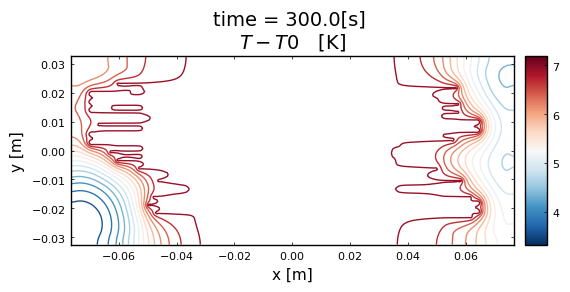

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\FKcum\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
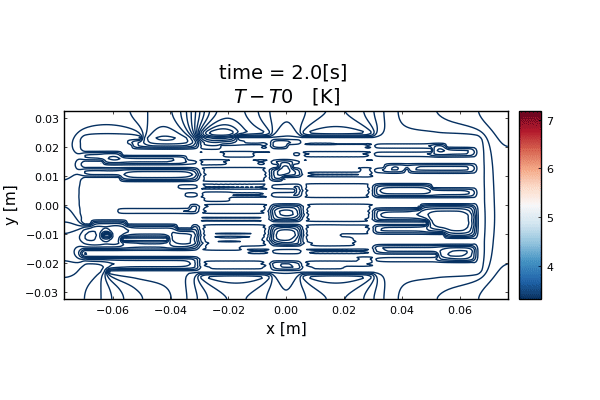

In [129]:
Tmax = maximum(temperature(plate_hist[end-1])[:])
Tmin = minimum(temperature(plate_hist[end-1])[:])
@gif for i = 1:1:length(plate_hist)
plot(temperature(plate_hist[i]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),line_z=0,xlabel="x [m]",ylabel="y [m]",title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  L"T - T0 \quad [\mathrm{K}]"))
end

In [ ]:
@gif for ii=1:length(sysfinal)
    plot(sysfinal[ii],plottype="T",ylim=(-4.0,1.0))
end

In [1]:
@gif for ii=1:length(sysfinal)
    plot(sysfinal[ii],plottype="ΔT",ylim=(-4.0,1.0))
    plot!([0.0,sysfinal[ii].tube.L],[0.3,0.3],label="boiling threshold")
end

LoadError: LoadError: [91mUndefVarError: @gif not defined[39m
in expression starting at In[1]:1

In [ ]:
@gif for ii=1:length(sysfinal)
    plot(sysfinal[ii],plottype="P")
end

In [ ]:
plot(sys.qline[1].arccoord,sys_to_heatflux(sysfinal[end]))

In [71]:
randomXp(sysfinal[end],numofslugs=60,chargeratio=0.45)

60-element Array{Tuple{Float64,Float64},1}:
 (20.982950482664833, 21.311500226171646)
 (21.555450482664835, 21.763517799481907)
 (22.127950482664833, 22.490086142811865)
 (22.700450482664834, 22.96221472447377)
 (23.272950482664832, 23.494109772345166)
 (23.845450482664834, 24.049176497282172)
 (24.417950482664835, 24.661552539073845)
 (24.990450482664833, 25.26811334318525)
 (25.56295048266483, 25.970168633260187)
 (26.135450482664833, 26.513465128584663)
 (26.707950482664835, 26.914385694504517)
 (27.280450482664833, 27.599915622947613)
 (27.852950482664834, 28.122281023402643)
 ⋮
 (14.112950482664836, 14.25773188182081)
 (14.685450482664834, 14.895677235150202)
 (15.257950482664832, 15.425445861176136)
 (15.830450482664837, 16.028631864940728)
 (16.402950482664828, 16.68722981298184)
 (16.975450482664833, 17.067421297062495)
 (17.547950482664838, 17.77793662430485)
 (18.12045048266483, 18.358077455823754)
 (18.692950482664834, 18.995944833939106)
 (19.265450482664832, 19.41344710622

## plot tempeature line graph

In [8]:
inch = 2.54e-2;

# x = [-2.7inch,0.0,2.7inch];
# y = [0.0,0.0,0.0];

x = [0.0]
y = [0.0]

X =  VectorData(x,y);

In [9]:
H = Regularize(X,cellsize(sys),I0=origin(sys.grid))
g = ScalarData(X);

In [10]:
length(plate_hist)

151

In [11]:
plate_hist[1].t

1.9999999999998905

In [12]:
ghist = []
thist = []
for i = 1:length(plate_hist)
    H(g,temperature(plate_hist[i]))
    append!(ghist,deepcopy(g))
    append!(thist,plate_hist[i].t)
end

In [15]:
RTDx,RTDy = load("RTD1.jld2","RTDx","RTDy")

LoadError: [91mArgumentError: No file exists at given path: RTD1.jld2[39m

In [14]:
plot(thist,ghist)
scatter!(RTDx .- RTDx[1],RTDy .- RTDy[1])

LoadError: [91mUndefVarError: RTDx not defined[39m

## OHP animation

In [180]:
ρ = 2700;
c = 8.97e02;
k = 1.67e02;
d = 2e-3;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(2700.0, 897.0, 167.0, 6.895412692514142e-5, 0.002)

In [181]:
Δx = cellsize(sys)
ds = 1.5Δx
nturn = 16
#pitch = 0.125
length_ohp = 46.25*1e-3
height = 133.83*1e-3
gap = d
pitch = length_ohp/(2*nturn+1)
x0, y0 = height/2, length_ohp/2
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,3pi/2)
ohp = BasicBody(x,y)

Basic pointwise-specified body with 5601 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [184]:
sys.points

0 points of vector-valued Float64 data
Float64[]

In [ ]:
@gif for i=1:1:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    plot(ohp,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,xlabel="x ",ylabel="y ",border=:none,axis=nothing)
end